
Total number of glucose readings is: 7676

-------------------------------------------

Combine succesive meal readings (CHO, fat, protein), occuring within a 30 minute window,...


Total of 171 recorded meals.


A sample (head) of the meals dataframe...

                 Date  mg/dL  CHO (g)  Fat (g)  Protein (g)
0 2008-08-04 17:41:00  126.0    92.26    23.83        14.78
1 2008-08-05 05:31:00  126.0   194.72    11.59        35.83
2 2008-08-05 07:01:00  103.0     0.00     0.05         0.28
3 2008-08-05 09:56:00  108.0    26.95     0.39         1.29
4 2008-08-05 12:21:00  105.0    70.24     0.61        12.37
BG average for this patient is: 114.970557582 with a std of 22.0153001951


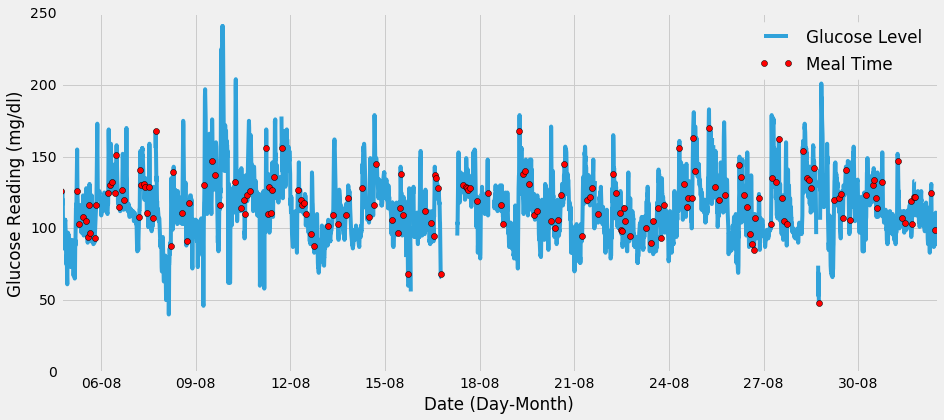

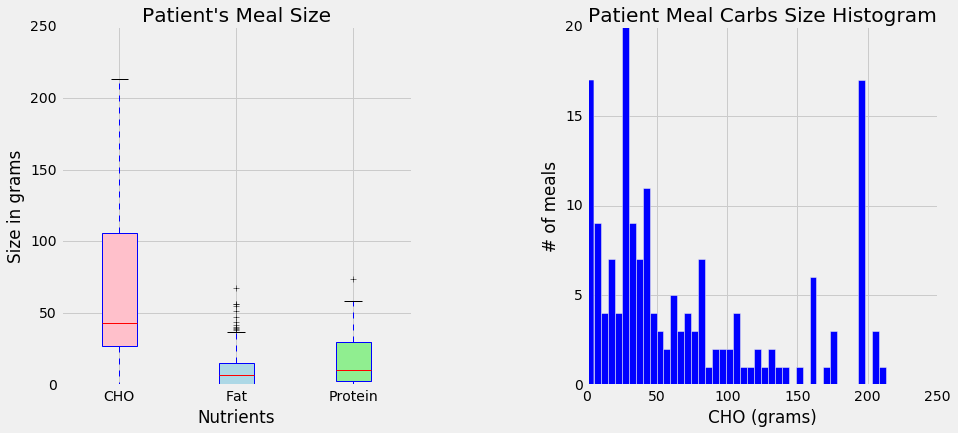



Data Cleaning...


-------------Condition 1-------------------

Remove meal data points with several missing BG readings in their postprandial window...


The meal at 2008-08-07 15:26:00 has 10 missing readings within its following 90 minutes. Thus, it will be removed.

The meal at 2008-08-15 17:21:00 has 6 missing readings within its following 90 minutes. Thus, it will be removed.

The meal at 2008-08-16 18:21:00 has 13 missing readings within its following 90 minutes. Thus, it will be removed.

The meal at 2008-08-18 06:16:00 has 14 missing readings within its following 90 minutes. Thus, it will be removed.

The meal at 2008-08-28 18:01:00 has 7 missing readings within its following 90 minutes. Thus, it will be removed.

The meal at 2008-08-31 18:11:00 has 4 missing readings within its following 90 minutes. Thus, it will be removed.

There are 165 remaining meal recordings.


-------------Condition 2-------------------

Remove meal data points which do NOT have significant BG INCRE

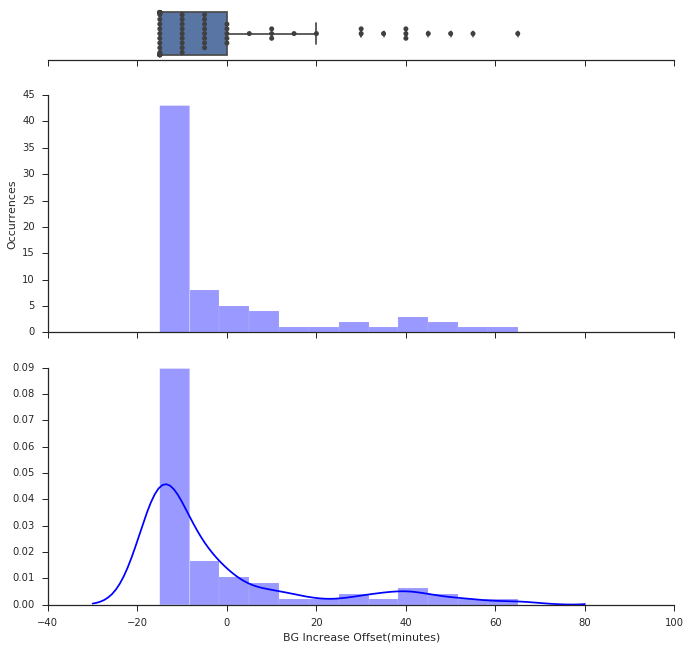


---------------------------------------

Aggregate all meals in one day chart to visualize meal timing pattern.



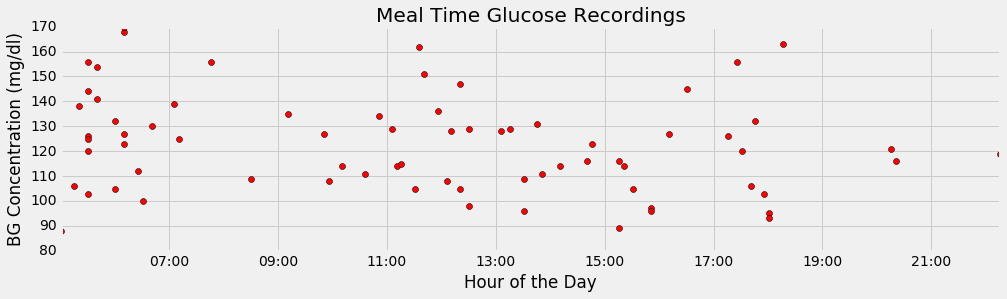

                  Date  mg/dL  CHO (g)  Fat (g) Protein (g)
0  2008-08-05 05:16:00  116.0   194.72    11.59       35.83
1  2008-08-05 09:46:00  102.0    26.95     0.39        1.29
2  2008-08-05 12:16:00  103.0    70.24     0.61       12.37
3  2008-08-05 14:26:00  103.0    68.32    17.08        6.64
4  2008-08-05 16:46:00  101.0    28.16     5.24        2.62
5  2008-08-05 20:06:00  111.0       85     20.2        14.8
6  2008-08-06 05:21:00  117.0   194.72    11.59       35.83
7  2008-08-06 11:26:00  135.0   180.46    11.87       20.19
8  2008-08-06 15:56:00  115.0       39        0         4.8
9  2008-08-06 17:41:00  120.0     40.5     7.65        10.4
10 2008-08-07 05:26:00  114.0    608.1    34.53      108.19
11 2008-08-07 12:16:00  101.0    81.24     0.61       14.37
12 2008-08-08 04:56:00   88.0    61.59     1.47       16.08
13 2008-08-08 07:41:00  106.0   206.69    11.47       36.18
14 2008-08-08 13:46:00  103.0    86.66    21.98          30
15 2008-08-09 06:26:00  118.0    61.59  

In [1]:
#Run the Data Preprocessing script first!

import warnings
warnings.filterwarnings('ignore')

#use the below couple lines to select which of the preprocessing file to use, comment the others

#%run ./Data_PreProcessing_Set_Mealtime.ipynb
#df_P_meals_w_deletion_v3 = copy.deepcopy(df_P_meals_w_deletion_v2)

%run ./Data_PreProcessing_Adjusted_Mealtime.ipynb
df_P_meals_w_deletion_v3 = copy.deepcopy(increase_pts_df)

In [2]:
#Original recording times
#print df_P_meals_w_deletion_v2

#Increase points
print increase_pts_df

                  Date  mg/dL  CHO (g)  Fat (g) Protein (g)
0  2008-08-05 05:16:00  116.0   194.72    11.59       35.83
1  2008-08-05 09:46:00  102.0    26.95     0.39        1.29
2  2008-08-05 12:16:00  103.0    70.24     0.61       12.37
3  2008-08-05 14:26:00  103.0    68.32    17.08        6.64
4  2008-08-05 16:46:00  101.0    28.16     5.24        2.62
5  2008-08-05 20:06:00  111.0       85     20.2        14.8
6  2008-08-06 05:21:00  117.0   194.72    11.59       35.83
7  2008-08-06 11:26:00  135.0   180.46    11.87       20.19
8  2008-08-06 15:56:00  115.0       39        0         4.8
9  2008-08-06 17:41:00  120.0     40.5     7.65        10.4
10 2008-08-07 05:26:00  114.0    608.1    34.53      108.19
11 2008-08-07 12:16:00  101.0    81.24     0.61       14.37
12 2008-08-08 04:56:00   88.0    61.59     1.47       16.08
13 2008-08-08 07:41:00  106.0   206.69    11.47       36.18
14 2008-08-08 13:46:00  103.0    86.66    21.98          30
15 2008-08-09 06:26:00  118.0    61.59  

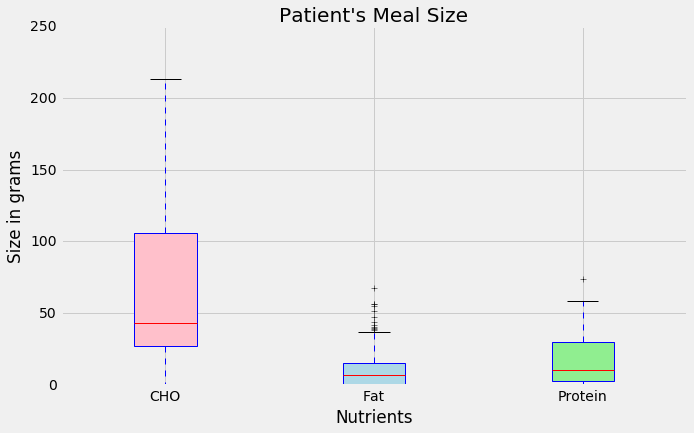

In [3]:
fig, axes = plt.subplots( figsize=(10, 6))
######################Box Plot
# rectangular box plot
bplot1 = axes.boxplot([df_P_meals['CHO (g)'],df_P_meals['Fat (g)'], df_P_meals['Protein (g)']],
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(3)],
         xticklabels=['CHO', 'Fat', 'Protein'])

axes.set_xlabel('Nutrients')
axes.set_ylabel('Size in grams')
axes.set_title('Patient\'s Meal Size')

In [4]:
#Key variables for this file

least_num_signals_per_inst = 4 #Consider instances with 4 readings or more
signal_duration = 60 #signals must be longer than this duration (minutes) to be accounted for
gl_2nd_increase = 10 #second increase of 10mg/dl, the plot stops if a second increase of this value is detected (mostly happens at next meal)
after_reading = 360 #max size of the plot after meal time in minutes, i.e: up to 10 hours

#This portion of the code finds the limit of each postprandial signal
stop_plot_date = []

#for x in range(0,2):
for x in range(peak_points_df['Date'].size):#excluding the last meal
    stop = 0
    
    #need to detect when there is a significant increase between current and compared glucose levels
    current_gl_Date = peak_points_df['Date'][x]
    current_gl = df_P.loc[df_P['Date'] == current_gl_Date]['mg/dL'].values[0] 
    
    compared_gl_date = current_gl_Date

    #Here, we check if there is a second BG increase after the peak, if found => stop plot at that point
    for d in drange(0,(after_reading-peak_elapsed_time[x]), 5):
        #print "first point to compare, date:", current_gl_Date, "bg is:", current_gl
        #for l in drange(0, (after_reading-peak_elapsed_time[x]), 5):
        for l in drange(0, 45, 5):
            compared_gl_date += datetime.timedelta(minutes=incr)
            compared_gl = df_P.loc[df_P['Date'] == compared_gl_date]['mg/dL'].values[0]  
            #print "Comparison to second point, date:", compared_gl_date, "bg is:", compared_gl           
            
            #if nan, stop here
            if (math.isnan(compared_gl)):
                stop = 1
                #Need to stop the plot at this current_gl date, so let's save it
                stop_plot_date.append(compared_gl_date - datetime.timedelta(minutes=incr))
                break      
            
            if (compared_gl - current_gl > gl_2nd_increase):
                #Find lowest point between current_gl and compared_gl
                lowest2nd_pt = current_gl
                lowest2nd_pt_date = current_gl_Date
                current_gl_temp_date = current_gl_Date
                #print "Enter Loop"
                for s in drange (0,(compared_gl_date - current_gl_Date).seconds / 60,5):
                    current_gl_temp_date += datetime.timedelta(minutes=incr)
                    current_gl_temp = df_P.loc[df_P['Date'] == current_gl_temp_date]['mg/dL'].values[0]
                    #print "current is: date", current_gl_temp_date, "bg is:", current_gl_temp
                    #print "lowest 2n is: date", lowest2nd_pt_date, "bg is:", lowest2nd_pt
                    if (current_gl_temp <= lowest2nd_pt):
                        lowest2nd_pt = current_gl_temp
                        lowest2nd_pt_date = current_gl_temp_date
                stop = 1
                #Need to stop the plot at this current_gl date, so let's save it
                stop_plot_date.append(lowest2nd_pt_date)
                break
        if (stop == 1):
            #print "Stop here", current_gl_Date
            #print "meal,", x
            break
        current_gl_Date += datetime.timedelta(minutes=incr)    
        current_gl = df_P.loc[df_P['Date'] == current_gl_Date]['mg/dL'].values[0] 
    
        compared_gl_date = current_gl_Date    
            
        if (d == after_reading-peak_elapsed_time[x]):
            #print "All the way"
            stop_plot_date.append(current_gl_Date)
            #print "meal,", x

stop_plot_bg_list = [] 

for k in range(len(stop_plot_date)):            
    stop_plot_bg = df_P.loc[df_P['Date'] == stop_plot_date[k]]['mg/dL'].values[0]
    stop_plot_bg_list.append(stop_plot_bg)


In [5]:
Plot_window = [i for i in np.arange(0, after_reading+incr, incr)]

def Plot_extraction_v2(df_P1_w_all_deletion, df_all_plots_v2):
    #print "size is", df_P1_w_all_deletion['Date'].size
    #print "stop plot size is ", len(stop_plot_date)
    for x in range(df_P1_w_all_deletion['Date'].size):
        nancount = 0 #if there are nan readings, stop at the first one
        a = df_P1_w_all_deletion['Date'][x]
        
        #Check if it's last reading, do not consider last meal
        if (x<(df_P1_w_all_deletion['CHO (g)'].size)):              
            b = a
            reading_list = []
            for j in Plot_window:
                reading = df_P.loc[df_P ['Date'] == b]['mg/dL']
                c = stop_plot_date[x]  #Stop at this date because there is another glucose increase right after it       
                try:
                    reading.values[0]
                except IndexError:
                    #print "Index out of range"
                    reading_list.append(float('nan'))
                    b += datetime.timedelta(minutes=incr)
                    continue

                if (((c - b).total_seconds() < 0)) : 
                    reading_list.append(float('nan'))
                    b += datetime.timedelta(minutes=incr)
                    continue
                else:
                    #store this value on the jth column of xth row of the new dataframe
                    reading_list.append(reading.values[0])
                    b += datetime.timedelta(minutes=incr)
        #print reading_list
        df_all_plots_v2.loc[x]=reading_list
    
    ##If the postprandial signal has many missing points within it, in the middle, remove it
    
    print "Total meals to be plotted are:", df_all_plots_v2.shape[0], "\n"

In [6]:
stop_pt = []
for k in range(len(stop_plot_date)):
    stop_pt.append(((stop_plot_date[k] - df_P_meals_w_deletion_v3['Date'][k]).seconds)/60)

def plotting(df_all_plots_v2, df_P1_w_all_deletion):
    first = True
    plt.figure(figsize=(20,12))
    #for j in range(0,1):
    for j in range(len(df_all_plots_v2)):
        #print df_all_plots_v2.iloc[j]
        #print df_P1_w_all_deletion.iloc[j]
        
        #print peak_points_df['mg/dL'][j]
        row = df_all_plots_v2.iloc[j]
 
        if (first==True):
            #Recorded meal time reading
            plt.plot(0, df_all_plots_v2[0][j], 'ro', markersize=12, label ='Meal Recordings')
            #Lowest surrounding point of increase
            plt.plot(peak_elapsed_time[j], peak_points_df['mg/dL'][j], 'y*', markersize=15, label ='Glucose Peaks')
            first = False
            row.plot(label='Meal Time Carbs {} g'.format(round((df_P1_w_all_deletion['CHO (g)'][j]),2)))
            continue
        
        row.plot(label='Meal Time Carbs {} g'.format(round((df_P1_w_all_deletion['CHO (g)'][j]),2)))
        plt.plot(0, df_all_plots_v2[0][j], 'ro', markersize=12)
        plt.plot(peak_elapsed_time[j], peak_points_df['mg/dL'][j], 'y*', markersize=15)            
        
        #plt.plot(stop_pt[j], stop_plot_bg_list[j], 'b*', markersize=15)
 

    plt.xlabel('Minutes')
    plt.ylabel('Glucose Reading (mg/dl)')
    plt.legend(loc='upper right')
    title = 'Post-meal BG variation of Different Meals'.format(after_reading)
    plt.title(title);

Total meals to be plotted are: 72 



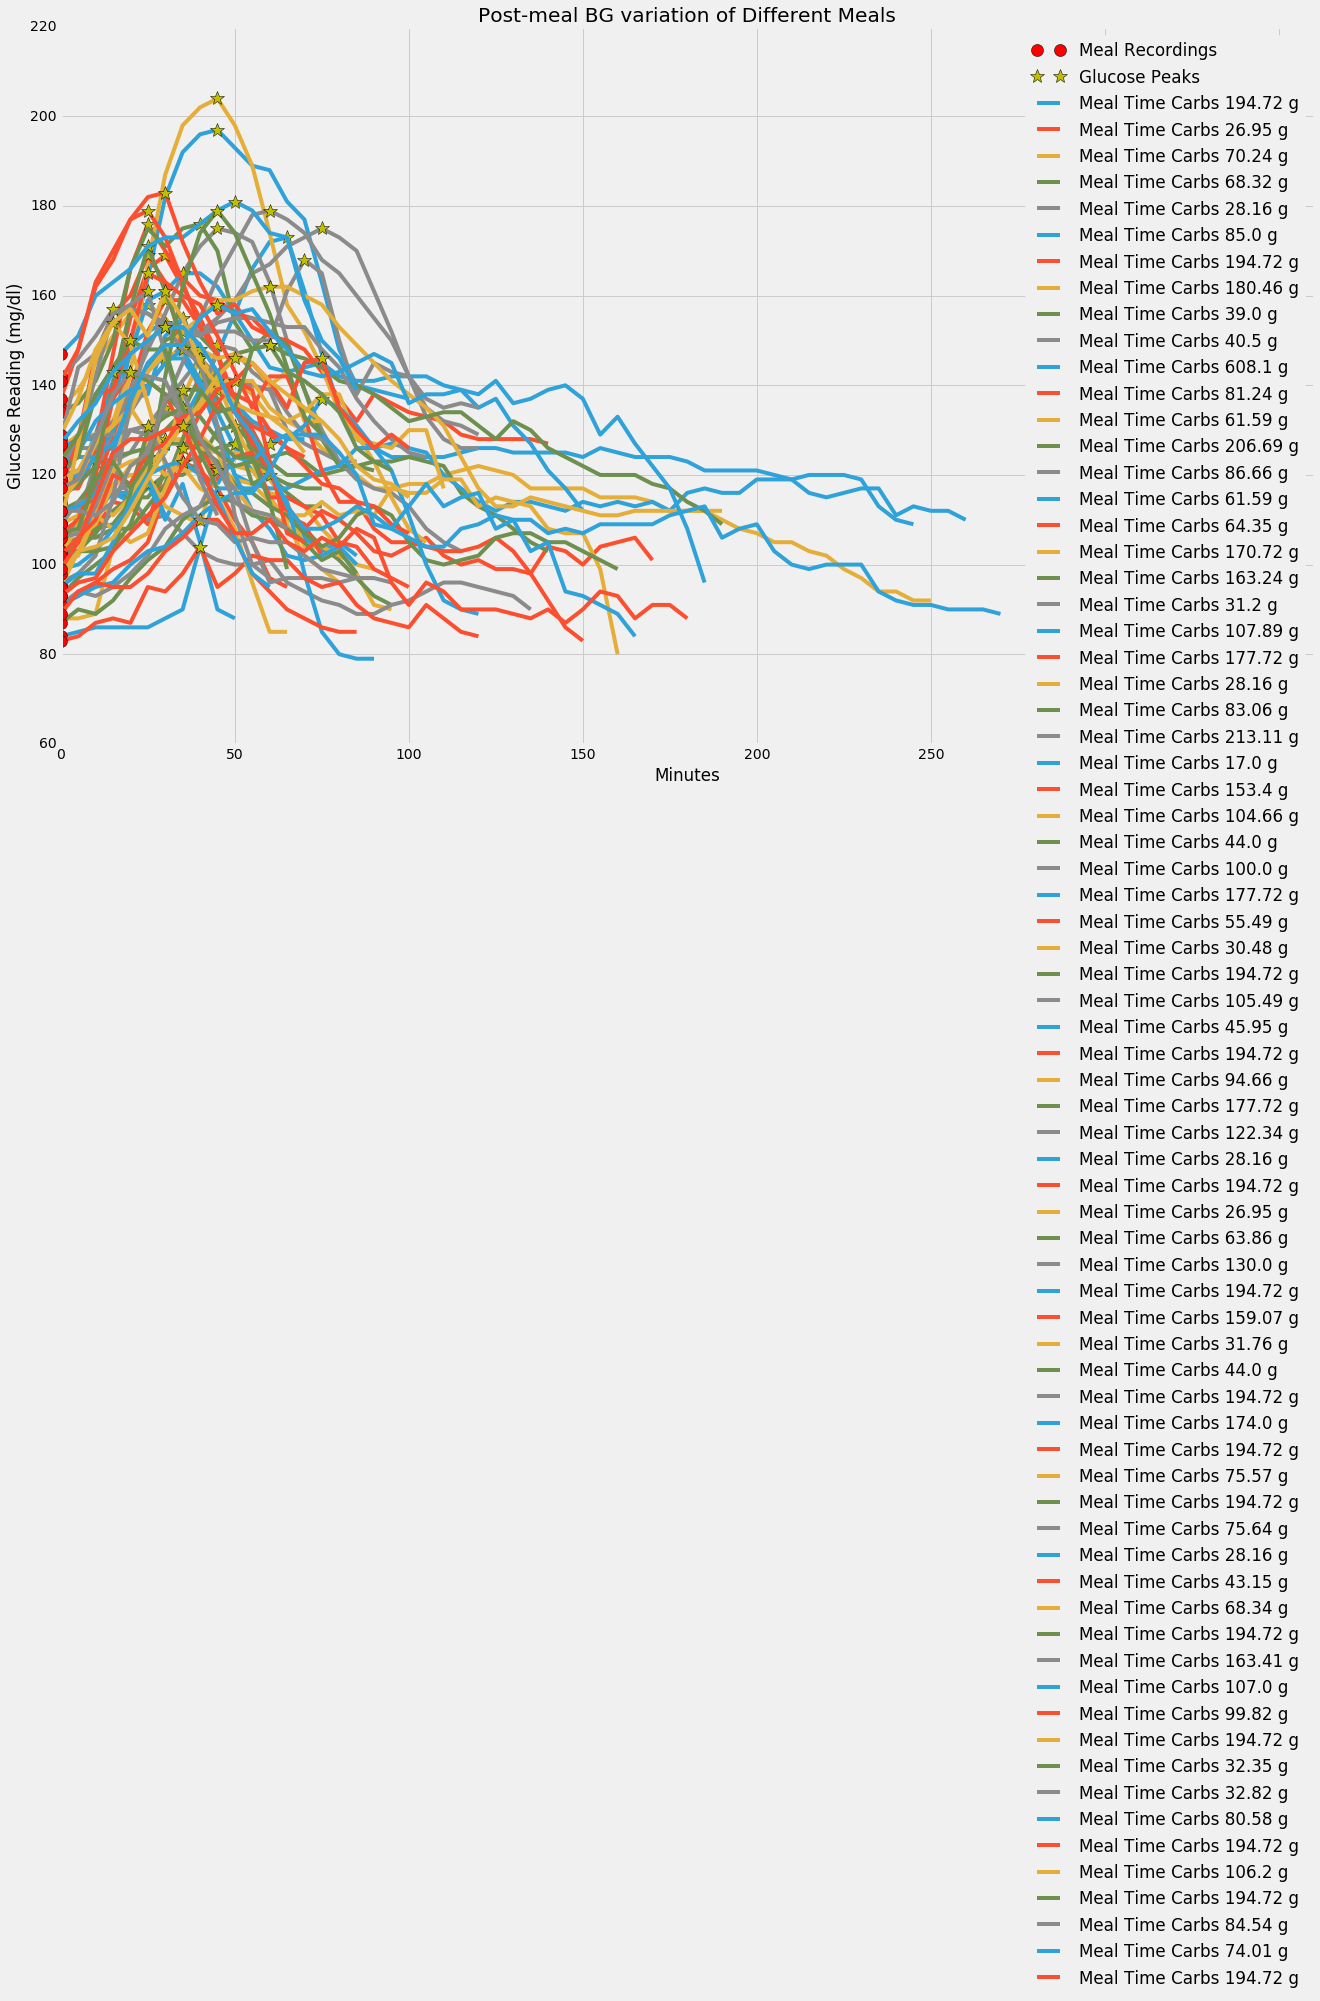

In [7]:
df_all_plots_v2 = pd.DataFrame(columns=Plot_window)

Plot_extraction_v2(df_P_meals_w_deletion_v3, df_all_plots_v2)
plotting(df_all_plots_v2, df_P_meals_w_deletion_v3)

### Remove plots which have a duration less than 60 minutes

In [8]:
print df_all_plots_v2.shape[0]

def remove_short_signals(period_signals):
    #Detect first NaN occurance on the signal, if less than 90 minutes remove that signal
    global signal_incomplete
    signal_incomplete = []
    for j in range(period_signals.shape[0]):
        #print "j is:", j 
        #print period_signals.iloc[j]
        out = np.argwhere(np.isnan(period_signals.iloc[j]))
        try:
            out[0][0]
        except IndexError:
            #print "full signal, no NAN"   
            continue   
        #print out[0][0]
        #print "j is:", out[0]
        if ((out[0][0]*5) < signal_duration): #if signal is less than 90 minutes
            signal_incomplete.extend([j])

remove_short_signals(df_all_plots_v2)  

#print signal_incomplete  
print len(signal_incomplete), "signals are removed from all postprandial signals.\n"
df_all_plots_v2.drop(df_all_plots_v2.index[signal_incomplete], axis=0,inplace=True)
df_all_plots_v2 = df_all_plots_v2.reset_index(drop=True)

print "Total remaining meals are:", df_all_plots_v2.shape[0]

72
6 signals are removed from all postprandial signals.

Total remaining meals are: 66


In [9]:
#Original recording times
df_P_meals_w_deletion_v2.drop(df_P_meals_w_deletion_v2.index[signal_incomplete], axis=0,inplace=True)
df_P_meals_w_deletion_v2 = df_P_meals_w_deletion_v2.reset_index(drop=True)

#Increase points
increase_pts_df.drop(increase_pts_df.index[signal_incomplete], axis=0,inplace=True)
increase_pts_df = increase_pts_df.reset_index(drop=True)


In [10]:
#print df_all_plots_v2

### We shall work with "increase_pts_df" since the postprandial signals in "df_all_plots_v2" start from the increase points.

### Start training

In [30]:
from sklearn import preprocessing

#Keep only features to be used for training
training_set = increase_pts_df.drop(['Date'], axis=1)
train_set = copy.deepcopy(training_set)

#Select the output to be predicted
minute = 150
testing_set = df_all_plots_v2[df_all_plots_v2.columns[minute/5]]
predict_set = copy.deepcopy(testing_set)

#If there are any nan values in the output, get their index to be removed from training set
index_nan = predict_set.index[predict_set.apply(np.isnan)]
#print index_nan

#Remove the testing set rows which have nan in their output
predict_set.drop(predict_set.index[index_nan],axis=0,inplace=True)

#Remove the training set rows which have nan in their output
train_set.drop(train_set.index[index_nan],axis=0,inplace=True)

train_set = train_set.reset_index(drop=True)
predict_set = predict_set.reset_index(drop=True)

#print train_set
#print predict_set

#########################Strart NN Model############################

scaler2 = preprocessing.StandardScaler().fit(train_set)
train_set = scaler2.transform(train_set)

print train_set

[[ 0.04138029 -0.3227508   0.49069441 -0.41007632]
 [ 1.88575913  1.32442506 -0.18846328  0.00660071]
 [-0.72711089 -0.38763013 -1.10650838 -0.44331771]
 [ 1.19411707  0.07221941  0.82334308  0.89329559]
 [ 0.96356971 -1.49610046 -1.0706345  -0.52758078]
 [-1.49560207  0.85750092  1.81068998  1.82791993]
 [-0.11231794  0.0164853   0.02188808 -0.9512153 ]
 [-0.49656353 -1.03021162 -0.91164801 -0.85844862]
 [-0.65026177 -1.26350114 -0.84153089 -1.37948816]
 [-1.11135648  1.57048339 -0.21129211  1.21565982]
 [ 0.11822941 -0.39901852 -0.68009844 -1.17308229]
 [ 1.27096619 -0.51238481  2.07485216  0.58407331]
 [-0.88080912  1.57048339 -0.21129211  1.21565982]]


In [31]:
from sklearn.neural_network import MLPRegressor

mlr = MLPRegressor(solver='lbfgs', alpha=1e-5, 
                     hidden_layer_sizes=(10, ), random_state=1)
mlr.fit(train_set, predict_set)  

mlr.score(train_set, predict_set)    

0.67963256517108184

In [32]:
count = 0
print len(np.array(predict_set))
for a, b in zip(np.array(predict_set),mlr.predict(train_set)):
    print (a," ", b)
    if (abs(a-b)<= 20):
        print "True"
        count +=1
    else:
        print "False"
print "Accuracy is:", count*100/len(np.array(predict_set))        

13
(124.0, ' ', 113.97511008147995)
True
(117.0, ' ', 121.18393013225244)
True
(100.0, ' ', 107.51012413933896)
True
(112.0, ' ', 106.75204075976532)
True
(114.0, ' ', 116.86299546844907)
True
(83.0, ' ', 83.869479407912806)
True
(112.0, ' ', 118.65058972805986)
True
(122.0, ' ', 113.14432196592956)
True
(107.0, ' ', 118.00573316681438)
True
(103.0, ' ', 96.085185083695691)
True
(137.0, ' ', 122.54979258027439)
True
(107.0, ' ', 112.10941042868325)
True
(90.0, ' ', 96.599165824343203)
True
Accuracy is: 100


In [ ]:
#mlr.predict(X_predict_age)